In [23]:
import pandas as pd
from pathlib import Path 
txt = Path ("/Users/emilyzou/Desktop/pol/pol_sep23_24_data/9_23_all_articles.txt").read_text()

In [25]:
import pandas as pd
from pathlib import Path 
txt = Path ("/Users/emilyzou/Desktop/pol/pol_sep23_24_data/12_23all_articles.txt").read_text()

In [26]:
txt_list = txt.split('Anonymous ID:')
# split the text by ID 

In [22]:
txt_list[145]

'P8hFIcP3 Mon 25 Dec 2023 15:36:49\n4chan Time: 12/25/23(Mon)18:36\n No.453050969  Replies: 3 ViewReport\nSancta Maria\ngratia plena\nDominus tecum\nBenedicta tu in mulieribus\net benedicus fructus ventris tui Jesus\nSancta Maria\nmater Dei\nora pro nobis pecatoribus\nNunc et in hora mortis nostrae\nAmen\n\n'

In [27]:
txt_list = txt_list[1:]


In [28]:
txt_df = pd.DataFrame(txt_list, columns = ['Raw_Text'])

In [8]:
txt_df

,Raw_Text
0,yaNHupza Sat 30 Dec 2023 18:45:00 No.453560084...
1,SoVAW3IN Sat 30 Dec 2023 17:15:10 No.453553253...
2,NqjUL9LT Sat 30 Dec 2023 15:39:49 No.453545224...
3,ju0FjS2G Sat 30 Dec 2023 13:36:43 No.453533850...
4,c3Laqy+S Sat 30 Dec 2023 13:25:53 No.453532748...
...,...
742,ODWJr2UF Fri 01 Dec 2023 12:03:21 No.450576254...
743,XoDb3eAr Fri 01 Dec 2023 11:54:20 No.450575532...
744,CJcEcwRI Fri 01 Dec 2023 07:10:30 No.450552351...
745,qyXy5ck6 Fri 01 Dec 2023 06:47:08 No.450550626...


In [21]:
txt_df['Raw_Text'][145]

' 25 Dec 2023 15:36:49\n\n No.  Replies: 3 Sancta Maria\ngratia plena\nDominus tecum\nBenedicta tu in mulieribus\net benedicus fructus ventris tui Jesus\nSancta Maria\nmater Dei\nora pro nobis pecatoribus\nNunc et in hora mortis nostrae\nAmen'

In [9]:
import re
def anonidget (elem): 
    return elem.split()[0] if elem else '' 
 
def date_get(s): 
    match = re.search(r'\s+(.*?)\s*No.', s)
    result = match.group(1) if match else ''
    return result 

def threadnoget (s): 
    match = re.search(r'No\.\s*(\S+)', s)
    result = match.group(1) if match else ''
    return result 

In [31]:
def date_get(s): 
    pattern = r'\b\w{3} \d{1,2} \w{3} \d{4} \d{2}:\d{2}:\d{2}\b'
    match = re.search(pattern, s)
    result = match.group(0) if match else ''
    return result 

In [32]:
txt_df['Date'] = txt_df['Raw_Text'].apply(date_get)

In [34]:
txt_df['Test'] = pd.to_datetime(txt_df['Date'], format='%a %d %b %Y %H:%M:%S')

In [10]:
txt_df['Anon_Id'] = txt_df['Raw_Text'].apply(anonidget)
txt_df['Date'] = txt_df['Raw_Text'].apply(date_get)
txt_df['Thread_No'] = txt_df['Raw_Text'].apply(threadnoget)

In [11]:
def Raw_Strip (s): 
    return s['Raw_Text'].replace(s['Anon_Id'], '').replace(s['Date'], '').replace(s['Thread_No'], '').strip()

txt_df['Raw_Text'] = txt_df.apply(Raw_Strip, axis = 1)

In [12]:
def process_string(s):
    if "ViewReport\n>>" in s:
        # Extract everything after "ViewReport\n>>" and before the next "\n"
        match = re.search(r'ViewReport\n>>\s*(.*?)\n', s)
        if match:
            extracted = match.group(1)
        else:
            extracted = ""
    #elif "ViewReport\n" in s:
        #extracted = "Original Post"
    else:
        extracted = ""
    
    # Remove the extracted part from the original string
    s = s.replace(match.group(0) if match else "ViewReport\n", "").strip() if extracted else s
    return extracted, s

# Apply the function to the DataFrame
txt_df[['OP_ID', 'Raw_Text']] = txt_df['Raw_Text'].apply(process_string).apply(pd.Series)

In [13]:
txt_df ['Raw_Text'] = txt_df ['Raw_Text'].str.replace('ViewReport\n', '', regex=False).str[3:]

In [14]:
df = txt_df

In [20]:
df['Date'][145]

'4chan Time: 12/25/23(Mon)18:36'

In [16]:
df
df ['Date1'] = pd.to_datetime (df['Date'], format='%a %d %b %Y %H:%M:%S') 

ValueError: time data "4chan Time: 12/25/23(Mon)18:36" doesn't match format "%a %d %b %Y %H:%M:%S", at position 145. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [39]:
def process_quotes(s):
    if "Quoted By" in s: 
        return re.findall(r'>>(\d+)\n', s)
    else:
        modified_string = s  # No modification needed if "Quoted By" is not present
        return "No Quote"

df['Quoted_By'] = df['Raw_Text'].apply(process_quotes)

In [42]:
def stripper (s): 
    if 'Quoted By' in s:
        cleaned_string = re.sub(r'Quoted By:|>>\d+\n', '', s)
        return cleaned_string.strip()
    else: 
        return s

df ['Raw_Text'] = df['Raw_Text'].apply(stripper)

In [43]:
df

,Raw_Text,Anon_Id,Date,Thread_No,OP_ID,Quoted_By
0,back in the day when you could actually roug...,1EWguvJu,Sat 30 Sep 2023 20:11:14,442941683,442941300,No Quote
1,"AVE MARIA, gratia plena,\nDominus tecum.\nBe...",2vxw5vE2,Sat 30 Sep 2023 15:18:10,442918956,442918517,No Quote
2,"the traditional is better:\nAVE MARIA, gratia ...",0jbK/UkI,Sat 30 Sep 2023 15:13:03,442918517,,"[442918956, 442917658]"
3,"We need more of everything, but to get that ...",DO5W/qJC,Sat 30 Sep 2023 14:42:03,442915873,442914706,No Quote
4,>prevent whites from attaining higher educta...,10oe7MzE,Sat 30 Sep 2023 12:34:21,442904522,442892406,No Quote
...,...,...,...,...,...,...
381,"If we focused more on DEI, SDGs, homosexuali...",/Fjtpid7,Fri 01 Sep 2023 22:32:56,440008576,,No Quote
382,I'm on my company's DEI committee. So I'd be...,eAz0sYSU,Fri 01 Sep 2023 20:52:50,440003093,439989139,No Quote
383,"Yeah, and like I told you last time; they're...",1VqJjDGs,Fri 01 Sep 2023 16:24:30,439983664,439982293,No Quote
384,">Notice whereever the Catholics has control,...",IxORDGq8,Fri 01 Sep 2023 11:22:33,439958652,439956232,No Quote


want to preserve misspellings / typos... but that makes its harder for NLP stuff
also whats the difference between supervised and unsupervised lmao 
also want to preserve the punctuation (greentext storytelling) and the newlines 

In [48]:
bf = pd.DataFrame(df['Anon_Id'], columns = ['Anon_Id'])

In [50]:
bf ['Raw_Text'] = df['Raw_Text']
bf

,Anon_Id,Raw_Text
0,1EWguvJu,back in the day when you could actually roug...
1,2vxw5vE2,"AVE MARIA, gratia plena,\nDominus tecum.\nBe..."
2,0jbK/UkI,"the traditional is better:\nAVE MARIA, gratia ..."
3,DO5W/qJC,"We need more of everything, but to get that ..."
4,10oe7MzE,>prevent whites from attaining higher educta...
...,...,...
381,/Fjtpid7,"If we focused more on DEI, SDGs, homosexuali..."
382,eAz0sYSU,I'm on my company's DEI committee. So I'd be...
383,1VqJjDGs,"Yeah, and like I told you last time; they're..."
384,IxORDGq8,">Notice whereever the Catholics has control,..."


In [51]:
def stringsplit (s):
    return s.split()

bf ['Raw_Pre_Tokens'] = bf['Raw_Text'].apply(stringsplit) # NOT ACTUALLY TOKENIZING i just want like a word count

,Anon_Id,Raw_Text,Raw_Pre_Tokens
0,1EWguvJu,back in the day when you could actually roug...,"[back, in, the, day, when, you, could, actuall..."
1,2vxw5vE2,"AVE MARIA, gratia plena,\nDominus tecum.\nBe...","[AVE, MARIA,, gratia, plena,, Dominus, tecum.,..."
2,0jbK/UkI,"the traditional is better:\nAVE MARIA, gratia ...","[the, traditional, is, better:, AVE, MARIA,, g..."
3,DO5W/qJC,"We need more of everything, but to get that ...","[We, need, more, of, everything,, but, to, get..."
4,10oe7MzE,>prevent whites from attaining higher educta...,"[>prevent, whites, from, attaining, higher, ed..."
...,...,...,...
381,/Fjtpid7,"If we focused more on DEI, SDGs, homosexuali...","[If, we, focused, more, on, DEI,, SDGs,, homos..."
382,eAz0sYSU,I'm on my company's DEI committee. So I'd be...,"[I'm, on, my, company's, DEI, committee., So, ..."
383,1VqJjDGs,"Yeah, and like I told you last time; they're...","[Yeah,, and, like, I, told, you, last, time;, ..."
384,IxORDGq8,">Notice whereever the Catholics has control,...","[>Notice, whereever, the, Catholics, has, cont..."


In [52]:
bf['Pre_Tokens_Count'] = bf['Raw_Pre_Tokens'].apply(len)
bf

,Anon_Id,Raw_Text,Raw_Pre_Tokens,Pre_Tokens_Count
0,1EWguvJu,back in the day when you could actually roug...,"[back, in, the, day, when, you, could, actuall...",50
1,2vxw5vE2,"AVE MARIA, gratia plena,\nDominus tecum.\nBe...","[AVE, MARIA,, gratia, plena,, Dominus, tecum.,...",39
2,0jbK/UkI,"the traditional is better:\nAVE MARIA, gratia ...","[the, traditional, is, better:, AVE, MARIA,, g...",34
3,DO5W/qJC,"We need more of everything, but to get that ...","[We, need, more, of, everything,, but, to, get...",282
4,10oe7MzE,>prevent whites from attaining higher educta...,"[>prevent, whites, from, attaining, higher, ed...",79
...,...,...,...,...
381,/Fjtpid7,"If we focused more on DEI, SDGs, homosexuali...","[If, we, focused, more, on, DEI,, SDGs,, homos...",30
382,eAz0sYSU,I'm on my company's DEI committee. So I'd be...,"[I'm, on, my, company's, DEI, committee., So, ...",11
383,1VqJjDGs,"Yeah, and like I told you last time; they're...","[Yeah,, and, like, I, told, you, last, time;, ...",34
384,IxORDGq8,">Notice whereever the Catholics has control,...","[>Notice, whereever, the, Catholics, has, cont...",26


/Users/emilyzou/opt/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/emilyzou/opt/miniconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


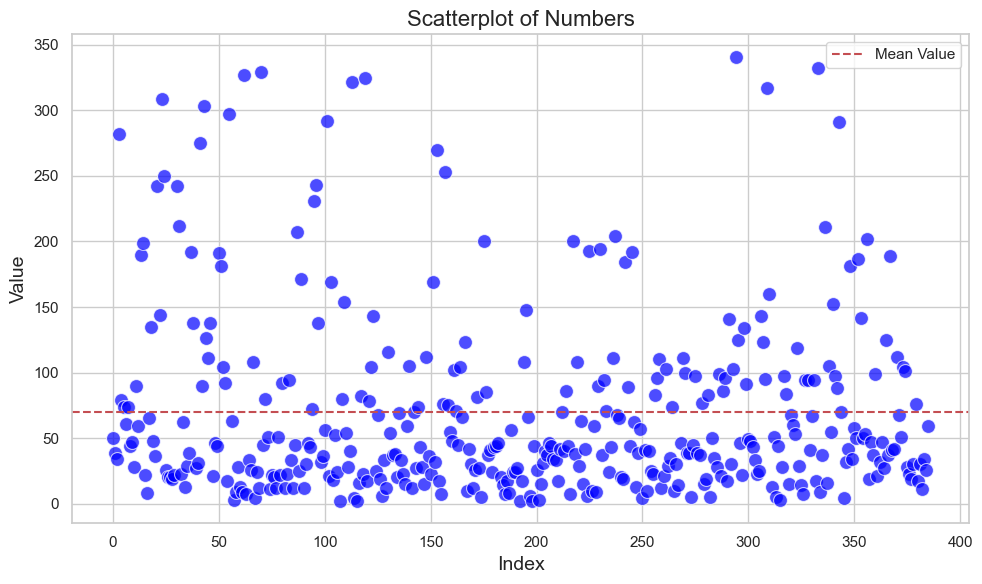

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = [x for x in bf['Pre_Tokens_Count']]

# Create a scatterplot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.scatterplot(x=np.arange(len(data)), y=data, s=100, color='blue', alpha=0.7)

# Customize the plot
plt.title('Scatterplot of Numbers', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.axhline(y=np.mean(data), color='r', linestyle='--', label='Mean Value')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()